# Maxwell–Boltzmann Distribution
### Authors: Lorenzo Braccini, Prof. Bart Hoogenboom, University College London

<font color=red>Note: the red texts are meant as side notes during the implementation.

</font> 

## Introduction:

Let us consider a gas (consisting of $N$ particles of mass $m$) at a temperature $T$. Can we predict the velocity of these particles?

This is an example of the **Canonical Distribution**:

$$P(E) = \frac{1}{Z} \; \Omega(E) \; e^{- \beta E}\; ,$$ where:
- $P(E)$ is the probabilty of the system to be in a state with energy E 
- $Z$ is the partition function $\left( Z = \sum_E \Omega(E) \; e^{- \beta E} \right)$
- $\Omega(E)$ is the multiplicity, *i.e.*, the number of states with energy $E$
- $e^{- \beta E}$ is the Boltzmann factor $\left( \beta = \frac{1}{k_B T} \right)$

Assuming that the energy of the particles in the gas is predominantly kinetic, we note that $P(E)=P\left( \frac{1}{2} m v^2 \right)=P(v)$, where $v\equiv\vert \vec{v} \vert$. We will therefore seek to determine $$P(v) = \frac{1}{Z} \; \Omega(v) \; e^{- \beta \frac{1}{2} m v^2}\; ,$$ the probability that a particle in the gas has an absolute velocity $v$.


## Content of the notebook:
1. [Section 1](#1) **Multiplicity of States**: investigate the number of states with the same velocity, *i.e.*, the multiplicity $\Omega(v)$; 
2. [Section 2](#2) **Maxwell–Boltzmann Distribution**: how does the Maxwell–Boltzmann Distribution vary with temperature and mass of the particles?;
3. [Section 3](#3) **Time Evolution of an Ideal Gas**: study of the velocity distribution of an ideal gas as function of time. How the Maxwell–Boltzmann Distribution emerges from a deterministic treatment, *i.e.*, classical collision between particle?

In [1]:
# Imports 

import sys
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from IPython.display import HTML

In [2]:
matplotlib inline

In [3]:
# set up figures dimensions
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

## 1) <a id='1'> </a> Multiplicity of States

In order to understand the behaviour of $P(v)$, we need to take into account the multiplitcity $\Omega \left(\frac{1}{2} m v^2 \right) = \Omega(v)$, *i.e.*, the number of ways a particle can move with velocity $v$. 

To determine $\Omega(v)$, we may presume the velocity states to be discretised and ask us: "how many of these states have an absolute velocity between $v$ and $v + \Delta v$?"

The discrete velocity states form a 3D lattice of points $\left(v_x, v_y, v_z \right)$, with $v = \left| \vec{v}\right| = \sqrt{v_x^2 + v_y^2 + v_z^2}$. The states with velocity between $v$ and $v + \Delta v$ are these states in the spherical shell with inner radius $v$ and thickness $v + \Delta v$.


### a) 2-D Simulation

Let us first work in 2D to simplify the viusalization. In this case, the states( between $v$ and $v + \Delta v$) lie in the circular shell with inner radius $ \left| \vec{v}\right| = \sqrt{v_x^2 + v_y^2}$.


In [4]:
vmax1 = 4                  # Max velocity
dv1 = 1                    # Delta velocity
Ncells1 = vmax1*2+1         # Number of lattice cells (odd number)
Npoints1 = (Ncells1)**2    # Number of lattice points

# generate lattice points
rbox1 = np.zeros((Npoints1,2))
count = 0
for i in range(- int((Ncells1-1)/2), int((Ncells1-1)/2)+1): # iterate over v_x, v_y, v_z
    for j in range(- int((Ncells1-1)/2), int((Ncells1-1)/2)+1):
        rbox1[count] = np.array([i,j])*dv1 # save the position of the lattice point
        count += 1 # move to the next point

@interact(v=(0,vmax1, dv1)) # interacting velocity 
def multiplicity(v):
    fig1 = plt.figure(figsize = (10,5)) # initialise the figure and set the dimension of the plot
    
    ##### first subplot #####
    ax1 = fig1.add_subplot(121) 
    
    # plot the circles 
    circle_out = plt.Circle((0,0), v+ dv1, color='r', alpha = 0.4, zorder=1)     # outer circle
    circle_in = plt.Circle((0,0), v, color='w', alpha = 1, zorder=2)            # inner circle
    ax1.add_artist(circle_out)
    ax1.add_artist(circle_in)
    
    # calculate the velocity
    vel1 = np.zeros(Npoints1)
    for i in range(Npoints1):
        vel1[i] = np.linalg.norm(rbox1[i])
  
    # plot the lattice points
    for i in range(Npoints1):
        if v  <= vel1[i] and vel1[i] < v + dv1 : # if they are inside the shell 
            ax1.scatter(rbox1[i,0],rbox1[i,1], s = 20, color ='r', zorder=4) # plot points 
        else:
            ax1.scatter(rbox1[i,0],rbox1[i,1], s = 10, color ='b', zorder=4) # plot points in different color
    
    # add labels, title, axes, grid 
    ax1.set_xlabel('$v_x$') 
    ax1.set_ylabel('$v_y$')
    ax1.set_xlim(rbox1[:,0].min() - 0.5 , rbox1[:,0].max() + 0.5)
    ax1.set_ylim(rbox1[:,1].min() - 0.5 , rbox1[:,1].max() + 0.5)
    ax1.set_axisbelow(False)
    ax1.set_aspect(aspect = 'equal')
    ax1.grid(zorder=5)
    ax1.axvline(x=0, color='k',zorder=3)
    ax1.axhline(y=0, color='k',zorder=3)
    ax1.set_title('2-D Lattice')
    
    ##### Second subplot #####
    ax2 = fig1.add_subplot(122)
    
    # calulate the points of the plot
    xs1 = np.arange(0, vmax1 + dv1, dv1)
    ys1 = np.zeros(len(xs1))
    for i in range(len(xs1)):
        ys1[i] = np.sum(np.where((vel1 >= xs1[i]) & (vel1 < xs1[i]+dv1) , 1, 0))
    
    # plot the points
    for i in range(len(xs1)):
        if xs1[i] == v:
            plt.scatter(xs1[i],ys1[i], color = 'r')
        else:
            plt.scatter(xs1[i],ys1[i], color = 'b')
    
    # set labels
    plt.xlabel('Velocity')
    plt.ylabel('Number of states')
    plt.title('Plot of the multiplicity as function of the velocity')
    plt.grid();
    

interactive(children=(IntSlider(value=2, description='v', max=4), Output()), _dom_classes=('widget-interact',)…

<font color=red>Note: the relation should be linear (area of the shell is $\propto r$). I am looking for the problem.

</font> 

The number of states is proportional to the surface of circular shell, *i.e.* $2\pi v dv$. This is similar to the 3-D space.

### a) 3-D Simulation

In [5]:
vmax2 = 3                  # Max velocity
dv2 = 1                    # Delta velocity
Ncells2 = vmax2*2+1           # Number of lattice cells (odd number)
Npoints2 = (Ncells2)**3    # Number of lattice points

# generate lattice points
rbox2 = np.zeros((Npoints2,3))### a) 2-D Simulation

count = 0
for i in range(- int((Ncells2-1)/2), int((Ncells2-1)/2)+1): # iterate over v_x, v_y, v_z
    for j in range(- int((Ncells2-1)/2), int((Ncells2-1)/2)+1):
        for k in range(- int((Ncells2-1)/2), int((Ncells2-1)/2)+1):
            rbox2[count] = np.array([i,j,k])*dv2 # save the position of the lattice point
            count += 1 # move to the next point

@interact(v=(0,vmax2, dv2)) # interacting velocity 
def multiplicity(v):
    fig2 = plt.figure(figsize = (10,5)) # initialise the figure and set the dimension of the plot
    
    ##### first subplot #####
    ax1 = fig2.add_subplot(121, projection = '3d') # add a 3D subplot

    # generate angles for sphere
    phi = np.linspace(0, 2*np.pi, 20)
    theta = np.linspace(0, np.pi, 20)
    
    # find points of the unit sphere
    x = np.outer(np.cos(phi), np.sin(theta))
    y = np.outer(np.sin(phi), np.sin(theta))
    z = np.outer(np.ones(np.size(phi)), np.cos(theta))
    
    # plot the two spheres
    ax1.plot_surface(v*x, v*y, v*z, color='r', alpha = 0.1)                # inner sphere
    ax1.plot_surface((v+dv2)*x, (v+dv2)*y, (v+dv2)*z, color='r', alpha = 0.1) # outer sphere
    
    # calulate the velocities
    vel2 = np.zeros(Npoints2)
    for i in range(Npoints2):
        vel2[i] = np.linalg.norm(rbox2[i])
  
    # plot the lattice points
    for i in range(Npoints2):
        if v  <= vel2[i] and vel2[i] < v + dv2 : # if they are inside the shell (-0.05 to include zero)
            ax1.scatter(rbox2[i,0],rbox2[i,1],rbox2[i,2], s = 20, color ='r') # plot points 
        else:
            ax1.scatter(rbox2[i,0],rbox2[i,1],rbox2[i,2], s = 10, color ='b') # plot points in different color
            
    # add labels, title, axes
    ax1.set_xlabel('$v_x$') 
    ax1.set_ylabel('$v_y$')
    ax1.set_zlabel('$v_z$')
    ax1.plot([rbox2[:,0].min() - 1, rbox2[:,0].max() + 1], [0,0], [0,0], color = 'black')
    ax1.plot([0, 0], [rbox2[:,1].min() - 1, rbox2[:,1].max() + 1], [0, 0], color = 'black')
    ax1.plot([0, 0], [0,0], [rbox2[:,2].min() - 1, rbox2[:,2].max() + 1], color = 'black')
    ax1.set_xlim(rbox2[:,0].min() - 0.5 , rbox2[:,0].max() + 0.5)
    ax1.set_ylim(rbox2[:,1].min() - 0.5 , rbox2[:,1].max() + 0.5)
    ax1.set_zlim(rbox2[:,2].min() - 0.5 , rbox2[:,2].max() + 0.5)
    ax1.set_title('3-D Lattice')
    
    ##### Second subplot #####
    ax2 = fig2.add_subplot(122)
    
    # calulate the points of the plot
    xs2 = np.arange(0, vmax2 + dv2, dv2)
    ys2 = np.zeros(len(xs2))
    for i in range(len(xs2)):
        ys2[i] = np.sum(np.where((vel2 >= xs2[i]) & (vel2 < xs2[i]+dv2) , 1, 0))
    
    # plot the points
    for i in range(len(xs2)):
        if xs2[i] == v:
            plt.scatter(xs2[i],ys2[i], color = 'r')
        else:
            plt.scatter(xs2[i],ys2[i], color = 'b')
    
    # set labels
    plt.xlabel('v')
    plt.ylabel('Number of states')
    plt.title('Plot of the multiplicity as function of the velocity')
    plt.grid();

interactive(children=(IntSlider(value=1, description='v', max=3), Output()), _dom_classes=('widget-interact',)…

The number of states scales with the volume of the shell, which is $4 \pi v^2 \Delta v $.

Let us rewrite $P(v)$ as a distribution:

$$
P(v) = \frac{1}{Z} \; \Omega(v) \; e^{- \beta \frac{1}{2} m v^2 } \;\; \to \;\; P(v) \Delta v = \frac{1}{Z} \cdot \rho(v) \cdot e^{- \beta \frac{1}{2} m v^2 } \Delta v \; ,
$$
where $P(v) \Delta v$ is the probability that particle has velocity between $v$ and $v + \Delta v$. 

$\rho(v) \Delta v $ is the number of states with velocity between $v$ and $v + \Delta v$, *i.e.*, $\rho(v)$ represents the number of states per velocity interval. This is often called the "density of states". Here, $\rho(v) \propto 4 \pi v^2$. 

Considering arbitrary small velocity interval $dv$, we may rewrite this as:
$$
P(v) d v = \frac{4 \pi}{Z} v^2 e^{- \beta \frac{1}{2} m v^2 } d v \; ,
$$
where $Z = 4 \pi \int_0^{\infty} v^2 e^{- \beta \frac{1}{2} m v^2 } d v $ ensures that the probability distribution is normalized. This is know as **Maxwell–Boltzmann Distribution**.

## 2) <a id='2'> </a> Maxwell–Boltzmann Distribution

Making the substitution $x^2 = \beta \frac{1}{2} m v^2$:
$$
Z = 4 \pi \int_0^{\infty} v^2 e^{- \beta \frac{1}{2} m v^2 } d v = 4 \pi \left( \frac{2 k_B T}{m} \right)^{\frac{3}{2}} \int_0^{\infty} x^2 e^{- x^2 } d x 
$$
and knowing that $\int_{- \infty}^{\infty} x^2 e^{- x^2 } d x = \frac{\sqrt{\pi}}{4}$, it is possible to write $Z =  \left( \frac{2 \pi k_B T}{m} \right)^{\frac{3}{2}} $. This give the Maxwell–Boltzmann Distribution:

$$
P(v) d v = 4 \pi \left( \frac{m}{2 \pi k_B T}\right)^{\frac{3}{2}} v^2 e^{-\frac{ m v^2 }{2 k_B T}} d v
$$

In [6]:
def Maxwell_Boltzmann(T,m,v):
    """
    Calculate the Maxwell–Boltzmann Distribution.
    Inputs:
    T      Temperature
    m      Mass of the particle
    v      Velocities (array-like)
    Output: Probability distribution
    """
    return 4*np.pi*(m/(2*np.pi*k*T))**(3/2)*v**2*np.e**(-(m*v**2)/(2*k*T))

In [7]:
m_u = 1.66e-27 # Dalton (Kg)
k = 1.38064852e-23 # m2 kg s-2 K-1 (Boltzmann constant)

vmin3 = 0
vmax3 = 1500
Npoints3 = 200
vel3 = np.linspace(vmin3, vmax3, Npoints3)

@interact(T=(60,400,20), m=(5,50,5)) # interacting velocity 
def plot_distribution(T,m):
    fig3 = plt.figure(figsize = (10,5)) # initialise the figure and set the dimension of the plot
    
    plt.plot(vel3, Maxwell_Boltzmann(T,m*m_u,vel3), label='Distribution') # plot the distribution
    
    # calulate and plot the mean and most-probable velocities 
    vmean = np.sqrt(3*k*T/(m*m_u))
    vprob = np.sqrt(2*k*T/(m*m_u))
    plt.axvline(x=vmean, ymin = 0, ymax =  Maxwell_Boltzmann(T,m*m_u,vmean)*200,
                color='g', label='Mean velocity')
    plt.axvline(x=vprob, ymin = 0, ymax =  Maxwell_Boltzmann(T,m*m_u,vprob)*200,
                color='r', label='Most-probable velocity')
    
    # add features to the plot
    plt.xlim(vmin3,vmax3)
    plt.ylim(0, 0.005)
    plt.xlabel('Velocity (m/s)')
    plt.ylabel('Probability Density (s/m)')
    plt.title('Maxwell–Boltzmann Distribution')
    plt.grid()
    plt.legend();
    

interactive(children=(IntSlider(value=220, description='T', max=400, min=60, step=20), IntSlider(value=25, des…

## 3) <a id='3'> </a> Time Evoution of an Ideal Gas 
The Maxwell–Boltzmann Distribution appears as an emerging behavior of "mean" probability distribution. The Maxwell–Boltzmann Distribution emerges for:

a) the instantanus velocity as the number of particles increases. The random fluctiuations become less relevant with high number of particls, and the istantaneus velocity (velocity at time t) approaches the Maxwell–Boltzmann Distribution;

b) the mean veloctiy distribution as the running-time increses. The Maxwell–Boltzmann Distribution can be interpretated as the average of the velocity distribution over time (for high t) of a system of (more than two) particles in a box.

Let us investigate both of these circustamces. 

### a) Velocity Distribution as function of number of particles

In the following subsection, the instantaneous velocity probability is plotted at a time t, *i.e.* the probability of finding a particle with a velocity between $v$ and $v + \Delta v$ at the time t. 

Thus, let us create a gas of N ideal particle with the same kinetic energy and with random velocity direction, and investigate how the system evolves. The particles collision with the walls and between themselves are modeled as perfectly elastic collisions. The collisions between particles change their velocities as time passes. As the number of particles increases, an emerging behavior appears: the Maxwell–Boltzmann Distribution. With a higher number of particles the random fluctuations become less relevant and the distribution approaches the Maxwell–Boltzmann Distribution.

The initial velocity of the particle is given by:

$$
\frac{1}{2}m \overline{v}^2 = \frac{3}{2} k_B T  
$$


In [8]:
def generate(N, R, Nsteps, T, boxlen):
    """
    Generate N particles at T in a random position and with a random velocity direction.
    Inputs:
    N        Number of particles
    R        Radius of the particles
    Nsteps   Number of steps of the simulation
    T        Temperature 
    boxlen   Lenght of the box
    Outputs: position and velocity of the partcles
    """
    v0 = np.sqrt(3*k*T/m) # initial velocity
    # generate array for storing position and velocities over the simulation
    r = np.zeros((Nsteps, N, 2)) 
    v = np.zeros((Nsteps, N, 2))

    r[0,0] = (boxlen - 2*R) *np.random.rand(2) + R # random initial positions of the first particle
    
    for i in range(1,N): # for every other particle
        over = True
        while over == True:
            r0 = (boxlen - 2*R) *np.random.rand(2) + R
            dr = r[0] - r0
            dis = np.sqrt(dr[:,0]**2 + dr[:,1]**2) 
            if np.min(dis) > 2*R: # check if the particl overlap with the others
                 over = False
        r[0,i] =  r0 # random initial positions
    
    # reandom velocity directions
    thetas = 2*np.pi*np.random.rand(N) 
    v[0,:,0] = np.cos(thetas)*v0
    v[0,:,1] = np.sin(thetas)*v0
    
    return r, v

In [9]:
def hardwall(r,v,boxlen, R):
    """Implements hard-wall boundary conditions for a particle
    Inputs:
    r       Positions of the particles
    v       Velocities of the particles
    boxlen  Lenght of the box
    R       Radius of the particles 
    Outputs: position and veloicity of the paritcles after the collision
    """
    rout = r
    vout = v
    for j in range(len(r)): # for each particle 
        if r[j,0] <= R:
            if v[j,0] < 0: 
                vout[j,0] = - v[j,0]
        if r[j,0] >= boxlen - R:
            if v[j,0] > 0: 
                vout[j,0] = - v[j,0]

        if r[j,1] <= R:
            if v[j,1] < 0: 
                vout[j,1] = - v[j,1]
        if r[j,1] >= boxlen - R:
            if v[j,1] > 0: 
                vout[j,1] = - v[j,1]
            
    return rout, vout

In [10]:
def overlap(r, v, N, R, dt):
    """
    Check if one particle overlap and update the velocities (collisions)
    Inputs:
    r       Positions of the particles
    v       Velocities of the particles
    N       Number of particles
    R       Radius of the particles
    dt      Time intervall
    Outputs: Updated veloicities of the paritcles after the collision
    """
    for i in range(N):
        for j in range(i+1, N): #check for overlap 
            dr1 =  r[i] - r[j]
            dis1 = np.sqrt(dr1[0]**2 + dr1[1]**2) 
            if dis1 < 2*R:
                dr2 = - r[j] - v[j]*dt + r[i] + v[i]*dt
                dis2 = np.sqrt(dr2[0]**2 + dr2[1]**2) 
                if dis1 > dis2:
                    norm = dr1/dis1
                    v1 = v[i] - np.inner(v[i] - v[j], norm)*norm
                    v2 = v[j] - np.inner(v[j] - v[i], norm)*norm

                    v[i] = v1
                    v[j] = v2

    return v 

In [11]:
def velocity_density(v, Nsteps, N, Ndiag):
    """
    Calculate the velocity probabiliyt density
    Inputs:
    v       Velocities of the particles
    Nsteps  Number of steps of the simulation
    N       Number of particles
    Ndiag   Number of bars in the hystogram
    Outputs: velocity density and maximum velocity 
    """
    vel = np.zeros((Nsteps,N))
    for i in range(Nsteps):
        for j in range(N):
            vel[i,j] = np.sqrt(v[i,j,0]**2 + v[i,j,1]**2)

    vel_den = np.zeros((Nsteps,Ndiag))
    vel_max =  np.max(vel)
    vel_step = vel_max/Ndiag
    
    for i in range(Nsteps):
        for j in range(N):
            for k in range(Ndiag):
                if (vel_step * k) <= vel[i,j]:
                    if vel[i,j] <= (vel_step * (k + 1)):
                        vel_den[i,k] = vel_den[i,k] + 1 
    
    vel_den = vel_den/N
    return vel_den, vel_max

Insert the number of particle of the simulation (suggest between 10 and 100):30


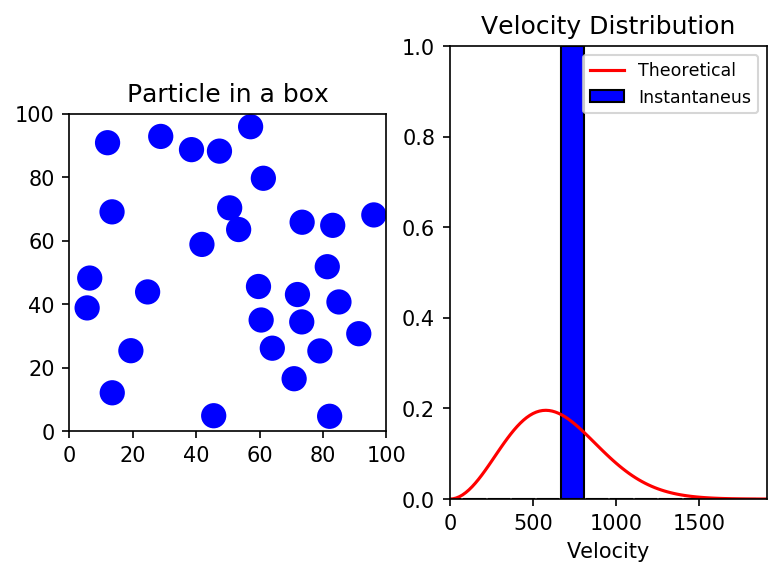

In [12]:
# Ask the number of particles
N = int(input("Insert the number of particle of the simulation (suggested between 10 and 100):")) 

######## Variables and Constants ########
m_u = 1.66e-27             # Dalton (Kg)
k = 1.38064852e-23         # m2 kg s-2 K-1 (Boltzmann constant)
m = 15*m_u                 # Mass of the particles
boxlen = 100               # Lenght of the box
R = boxlen/(5*np.sqrt(N))  # Radii of the particles (scale with N)
T = 300                    # Temperature
Nsteps = 300               # Number of frames
Ndiag = 10 + int(N/10)     # Number of bars in the diagram (scale with N)
dt = 0.001                 # Infinitesimal change in time
inter = 60                 # Interval between frames      

######## Simulation ########
r, v = generate(N, R, Nsteps, T, boxlen)
# Velocity Verlet algorithm
for i in range(1,Nsteps):
    v[i-1] = overlap(r[i-1], v[i-1], N, R, dt) # check collisions
    r[i] = r[i-1] + dt*v[i-1] # update position
    r[i], v[i] = hardwall(r[i],v[i-1],boxlen,R) # boundary conditions
    v[i] = v[i-1] #update velocitie

vel_den, vel_max = velocity_density(v, Nsteps, N, Ndiag) # calulate the velocity denisty 

######## Animation ########
# initialise the figure
fig4 = plt.figure(figsize = (6,4))
ax1 = fig4.add_subplot(121, title = 'Particle in the Box') 
ax2 = fig4.add_subplot(122, title = 'Velocity of the particles')

# calulate points for the plots
vs = np.linspace(0, vel_max, Ndiag)
xs = np.linspace(0, vel_max + vel_max/Ndiag , 100)
ys = Maxwell_Boltzmann(T,m,xs)

def animate1(frame):
    """
    Function which animates the moving particles
    """
    rs = r[frame]
    
    circles = [] #start a list for storing the cycle
    for j in range(N): #iterate for all the nuts
        circle = plt.Circle((rs[j,0], rs[j,1]), R, color='b') #make the cycle
        circles.append(circle) #store the cycle 
    
    # clear the simulation
    ax1.clear()
    ax2.clear()
    
    # set the graphs' features 
    ax1.set_xlim(0,boxlen)
    ax1.set_ylim(0,boxlen)
    ax1.set_aspect(aspect = 'equal')
    ax1.set_title('Particle in a box')
    ax2.set_xlim(0,vel_max + vel_max/Ndiag )
    ax2.set_ylim(0,1)
    ax2.set_xlabel('Velocity')
    #ax2.set_ylabel('Probability, P(v)')
    ax2.set_title('Velocity Distribution')
    
    #plot the cycles
    for circle in circles: 
        ax1.add_artist(circle)
    
    #plot the histrogam 
    ax2.bar(vs, vel_den[frame], width = (vel_max+1)/Ndiag, edgecolor='k', color='b', label='Instantaneus')
    ax2.plot(xs, vel_max/Ndiag*ys,color='r', label='Theoretical')
    ax2.legend(fontsize = 'small')
    
# call the animation
ani1 = animation.FuncAnimation(fig4, animate1, init_func=None, interval=60) 
HTML(ani1.to_html5_video())

### b) Velocity Distribution as Average Velocity of Over Time.  

Let us re-run the simulation but taking track the average velocity distribution over time.  

In [13]:
def Mean_Velocity_Distribution(v, Nsteps, N, Ndiag):
    """
    Calculate the velocity probabiliyt density
    Inputs:
    v       Velocities of the particles
    Nsteps  Number of steps of the simulation
    N       Number of particles
    Ndiag   Number of bars in the hystogram
    Outputs: Mean Velocity Distribution at each timestep
    """
    vel_den, vel_max = velocity_density(v, Nsteps, N, Ndiag)
    mean_vel = np.zeros((Nsteps,Ndiag))

    for i in range(1,Nsteps):
        for j in range(Ndiag):
            mean_vel[i] = np.average(vel_den[0:i], axis = 0)
    return mean_vel, vel_max

Insert the running time (suggested between 1 and 10 seconds):6


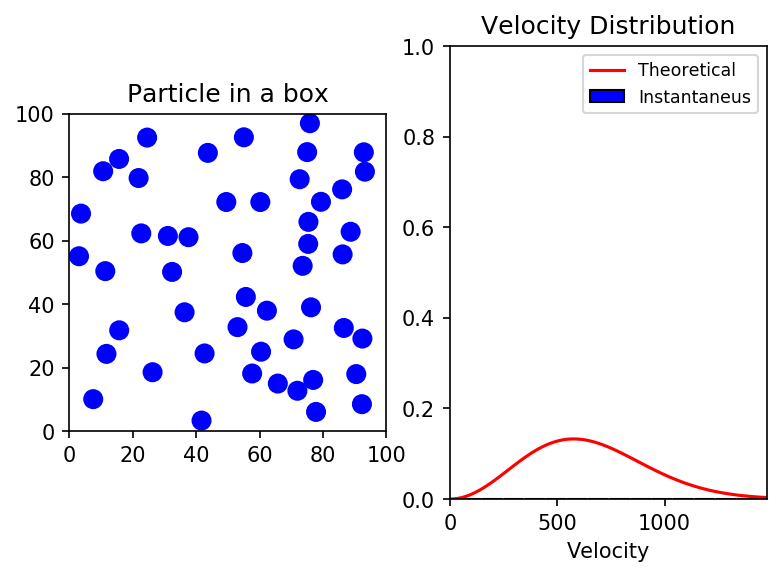

In [14]:
# Ask the number of particles
running_time5 = int(input("Insert the running time (suggested between 1 and 10 seconds):")) 

######## Variables and Constants ########
inter5 = 60                              # Interval between frames (ms)
Nsteps5 = int(running_time5*1000/inter5) # Number of frames
N5 = 50                                  # Number of particles 
m_u = 1.66e-27                           # Dalton (Kg)
k = 1.38064852e-23                       # m2 kg s-2 K-1 (Boltzmann constant)
m = 15*m_u                               # Mass of the particles
boxlen = 100                             # Lenght of the box
R5 = boxlen/(5*np.sqrt(N5))              # Radii of the particles (scale with N)
T = 300                                  # Temperature
Ndiag5 = 10 + int(N5/10)                 # Number of bars in the diagram (scale with N)
dt = 0.001                               # Infinitesimal change in time




## Ask the number of particles
##N = int(input("Insert the number of particle of the simulation (suggest between 10 and 100):")) 

######## Variables and Constants ########
#m_u = 1.66e-27             # Dalton (Kg)
#k = 1.38064852e-23         # m2 kg s-2 K-1 (Boltzmann constant)
#m = 15*m_u                 # Mass of the particles
#boxlen = 100               # Lenght of the box
#R = boxlen/(5*np.sqrt(N))  # Radii of the particles (scale with N)
#T = 300                    # Temperature
#Nsteps = 800               # Number of frames
#Ndiag = 10 + int(N/10)     # Number of bars in the diagram (scale with N)
#dt = 0.001                 # Infinitesimal change in time
#inter = 60                 # Interval between frames      

######## Simulation ########
r5, v5 = generate(N5, R5, Nsteps5, T, boxlen)
# Velocity Verlet algorithm
for i in range(1,Nsteps5):
    v5[i-1] = overlap(r5[i-1], v5[i-1], N5, R5, dt) # check collisions
    r5[i] = r5[i-1] + dt*v5[i-1] # update position
    r5[i], v5[i] = hardwall(r5[i],v5[i-1],boxlen,R5) # boundary conditions
    v5[i] = v5[i-1] #update velocitie

mean_vel5, vel_max5 = Mean_Velocity_Distribution(v5, Nsteps5, N5, Ndiag5) # calulate the velocity denisty 

######## Animation ########
# initialise the figure
fig5 = plt.figure(figsize = (6,4))
ax1 = fig5.add_subplot(121, title = 'Particle in the Box') 
ax2 = fig5.add_subplot(122, title = 'Velocity of the particles')

# calulate points for the plots
vs5 = np.linspace(0, vel_max5, Ndiag5)
xs5 = np.linspace(0, vel_max5 + vel_max5/Ndiag5 , 100)
ys5 = Maxwell_Boltzmann(T,m,xs5)

def animate2(frame):
    """
    Function which animates the moving particles
    """
    rs5 = r5[frame]
    
    circles = [] #start a list for storing the cycle
    for j in range(N5): #iterate for all the nuts
        circle = plt.Circle((rs5[j,0], rs5[j,1]), R5, color='b') #make the cycle
        circles.append(circle) #store the cycle 
    
    # clear the simulation
    ax1.clear()
    ax2.clear()
    
    # set the graphs' features 
    ax1.set_xlim(0,boxlen)
    ax1.set_ylim(0,boxlen)
    ax1.set_aspect(aspect = 'equal')
    ax1.set_title('Particle in a box')
    ax2.set_xlim(0,vel_max5 + vel_max5/Ndiag5 )
    ax2.set_ylim(0,1)
    ax2.set_xlabel('Velocity')
    #ax2.set_ylabel('Probability, P(v)')
    ax2.set_title('Velocity Distribution')
    
    #plot the cycles
    for circle in circles: 
        ax1.add_artist(circle)
    
    #plot the histrogam 
    ax2.bar(vs5, mean_vel5[frame], width = (vel_max5+1)/Ndiag5, edgecolor='k', color='b', label='Instantaneus')
    ax2.plot(xs5, vel_max5/Ndiag5*ys5,color='r', label='Theoretical')
    ax2.legend(fontsize = 'small')
    
# call the animation
ani1 = animation.FuncAnimation(fig5, animate2, init_func=None, interval=inter5, frames = Nsteps5) 
HTML(ani1.to_html5_video())

<font color=red>Note: I don't know why it prints the second imagine.
</font> 